In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
os.chdir("C:\\Users\\Thispc\\Desktop\\python\\carpred\\trailer-data")

In [3]:
df1= pd.read_csv('complete-data.csv')

In [4]:
df2=pd.read_csv('trailers_list.csv')

In [5]:
df1


,frame_number,gender,emotion,year,movie_name
0,28,woman,happy,2014,dedh_ishqiya
1,62,woman,happy,2014,dedh_ishqiya
2,60,man,angry,2014,dedh_ishqiya
3,60,man,sad,2014,dedh_ishqiya
4,60,man,angry,2014,dedh_ishqiya
...,...,...,...,...,...
32192,18,man,happy,2016,housefull_3
32193,25,man,neutral,2016,housefull_3
32194,25,man,neutral,2016,housefull_3
32195,25,man,happy,2016,housefull_3


<AxesSubplot:ylabel='Frequency'>

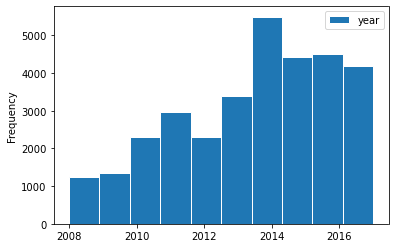

In [8]:
df1.plot(kind='hist',x='gender',y='year',edgecolor='white')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32197 entries, 0 to 32196
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   frame_number  32197 non-null  int64 
 1   gender        32197 non-null  object
 2   emotion       32197 non-null  object
 3   year          32197 non-null  int64 
 4   movie_name    32197 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [10]:
df1_woman = df1.loc[df1['gender'] == 'woman']
df1_man = df1.loc[df1['gender'] == 'man']
df1_woman = df1_woman.loc[df1['emotion'] != 'neutral']
df1_man = df1_man.loc[df1['emotion'] != 'neutral']
womanframesperyear = df1_woman.groupby(by=['year'])['frame_number'].count().to_frame(name = 'count').reset_index()
manframesperyear = df1_man.groupby(by=['year'])['frame_number'].count().to_frame(name = 'count').reset_index()

In [11]:
df1_man

,frame_number,gender,emotion,year,movie_name
2,60,man,angry,2014,dedh_ishqiya
3,60,man,sad,2014,dedh_ishqiya
4,60,man,angry,2014,dedh_ishqiya
5,111,man,sad,2014,dedh_ishqiya
7,94,man,sad,2014,dedh_ishqiya
...,...,...,...,...,...
32188,57,man,angry,2016,housefull_3
32189,124,man,sad,2016,housefull_3
32192,18,man,happy,2016,housefull_3
32195,25,man,happy,2016,housefull_3


In [12]:
df1_woman

,frame_number,gender,emotion,year,movie_name
0,28,woman,happy,2014,dedh_ishqiya
1,62,woman,happy,2014,dedh_ishqiya
6,132,woman,happy,2014,dedh_ishqiya
8,61,woman,sad,2014,dedh_ishqiya
15,35,woman,sad,2014,dedh_ishqiya
...,...,...,...,...,...
32176,32,woman,happy,2016,housefull_3
32177,32,woman,happy,2016,housefull_3
32178,47,woman,sad,2016,housefull_3
32183,159,woman,fear,2016,housefull_3


In [13]:
womanframesperyear

,year,count
0,2008,309
1,2009,280
2,2010,562
3,2011,755
4,2012,521
5,2013,817
6,2014,1256
7,2015,1165
8,2016,1214
9,2017,1026


In [14]:
manframesperyear

,year,count
0,2008,639
1,2009,677
2,2010,1210
3,2011,1480
4,2012,1232
5,2013,1715
6,2014,2861
7,2015,2135
8,2016,2165
9,2017,2038


In [15]:
res_woman = df1_woman.groupby(by=['emotion'])['frame_number'].count()
res_woman=res_woman.to_frame(name = 'count').reset_index()
labels=res_woman['emotion'].tolist()
res_man = df1_man.groupby(by=['emotion'])['frame_number'].count()
res_man=res_man.to_frame(name = 'count').reset_index()
labels=res_man['emotion'].tolist()

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

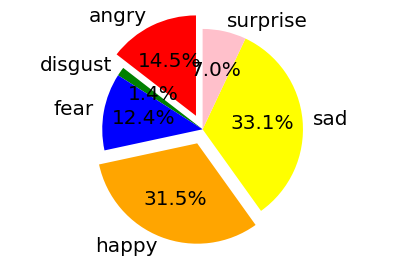

In [17]:
plt.rcParams.update({'font.size': 20})
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'pink', 'cyan']
plt.pie(res_woman['count'],labels=res_woman['emotion'], shadow=False, colors=colors, explode=(0.15, 0, 0, 0.15, 0, 0),startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.savefig('pie_chart_emotions_woman.png')

In [18]:
res_woman.to_csv('pie_chart_emotions_woman.csv', sep=',', encoding='utf-8')

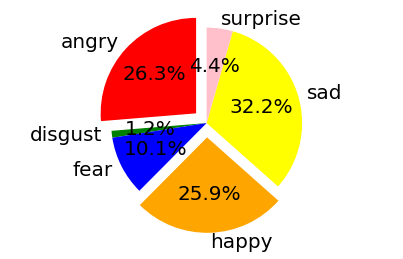

In [19]:
plt.rcParams.update({'font.size': 20})
plt.pie(res_man['count'],labels=res_man['emotion'], shadow=False, colors=colors, explode=(0.15, 0, 0, 0.15, 0, 0),startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.savefig('pie_chart_emotions_man.png')

In [20]:
res_man.to_csv('pie_chart_emotions_man.csv', sep=',', encoding='utf-8')

In [21]:
df2

,movie_name,year-of-release,trailer,movie
0,dedh_ishqiya,2014,1,0
1,love_sex_aur_dhokha,2010,1,0
2,newton,2017,1,0
3,band_baaja_baaraat,2010,1,0
4,the_blueberry_hunt,2016,1,0
...,...,...,...,...
875,warning,2013,1,0
876,ranbanka,2015,1,0
877,sadda_adda,2012,1,0
878,loveshhuda,2016,1,0


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_name       880 non-null    object
 1   year-of-release  880 non-null    int64 
 2   trailer          880 non-null    int64 
 3   movie            880 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 27.6+ KB


In [23]:
df2.isna().sum()

movie_name         0
year-of-release    0
trailer            0
movie              0
dtype: int64

In [24]:
df1.isnull().sum()

frame_number    0
gender          0
emotion         0
year            0
movie_name      0
dtype: int64

In [25]:

df1['gender'] = np.where((df1['gender'] == 'man'), 1, 0)
df1

,frame_number,gender,emotion,year,movie_name
0,28,0,happy,2014,dedh_ishqiya
1,62,0,happy,2014,dedh_ishqiya
2,60,1,angry,2014,dedh_ishqiya
3,60,1,sad,2014,dedh_ishqiya
4,60,1,angry,2014,dedh_ishqiya
...,...,...,...,...,...
32192,18,1,happy,2016,housefull_3
32193,25,1,neutral,2016,housefull_3
32194,25,1,neutral,2016,housefull_3
32195,25,1,happy,2016,housefull_3


In [26]:
X=df1.drop('gender',axis=1)
y=df1['gender']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [27]:
import category_encoders as ce

In [28]:
encoder = ce.OrdinalEncoder(cols=['emotion','movie_name'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [29]:
X_train

,frame_number,emotion,year,movie_name
16790,75,1,2016,1
16024,40,2,2010,2
1488,70,3,2014,3
21504,138,4,2016,4
29107,31,5,2016,5
...,...,...,...,...
29802,59,2,2013,89
5390,82,4,2013,302
860,69,3,2017,45
15795,179,1,2016,7


In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [31]:
Y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
(accuracy_score(Y_test,Y_pred))

0.6857751353270033

In [33]:
df2.isna().sum()

movie_name         0
year-of-release    0
trailer            0
movie              0
dtype: int64

In [34]:
df2.isna().sum()

movie_name         0
year-of-release    0
trailer            0
movie              0
dtype: int64

In [35]:
X=df2.drop('year-of-release',axis=1)
y=df2['year-of-release']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [36]:
encoder = ce.OrdinalEncoder(cols=['movie_name'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [38]:
Y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
(accuracy_score(Y_test,Y_pred))

0.09090909090909091

In [40]:
import datacompy

In [41]:
compare = datacompy.Compare(df1,df2,join_columns='movie_name')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns   Rows
0       df1        5  32197
1       df2        4    880

Column Summary
--------------

Number of columns in common: 1
Number of columns in df1 but not in df2: 4
Number of columns in df2 but not in df1: 3

Row Summary
-----------

Matched on: movie_name
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 851
Number of rows in df1 but not in df2: 31,346
Number of rows in df2 but not in df1: 29

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 851

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 1
Total number of values which compare unequal: 0

Sample Rows Only in df1 (First 10 Columns)
------------------------------------------

       frame_number  gender  emotion    year           